# **1 - Perkenalan**

---



Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Andik Al Fauzi

Batch : FTDS-RMT-018

Dataset : ftds-hacktiv8-project.phase1_ftds_018_rmt.heart-failure

Objective : Membuat model *Classification Supervised Learning*  dengan menggunakan *Random Forest Classifier* dan *Ada Boosting Classifier* untuk memprediksi apakah seorang pasien akan meninggal atau tidak menggunakan dataset yang sudah Anda dapatkan sesuai dari instruksi [Graded-Challenge 3](https://github.com/H8-Assignments-Bay/p1-ftds018-rmt-g3-andik-alfauzi)

# **2 - Query SQL**

Bagian ini menunjukan cara mendapatkan dataset dari Google Big Query dengan menggunakan query sql 

In [210]:
# Getting dataset from Google cloud
# select * from `ftds-hacktiv8-project.phase1_ftds_018_rmt.heart-failure`

# **3 - Import Libraries**

---



Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [211]:
# Importing libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Importing Libraries
import pickle
import json

# Warning Library
import warnings
warnings.filterwarnings('ignore')

# **4 - Data Loading**

---



Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [212]:
# Read data csv from big query
data = pd.read_csv('/content/drive/MyDrive/h8dsft_P1G3_Andik_Al_Fauzi/h8dsft_P1G3_Andik_Al_Fauzi.csv')

# Copy dataset to make sure the original is untoucable
copyData = data.copy()

# Display data after loading
copyData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.00,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.00,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.00,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.00,1.0,134,0,0,186,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0


Dataset berjumlah 299 baris data dan 13 column

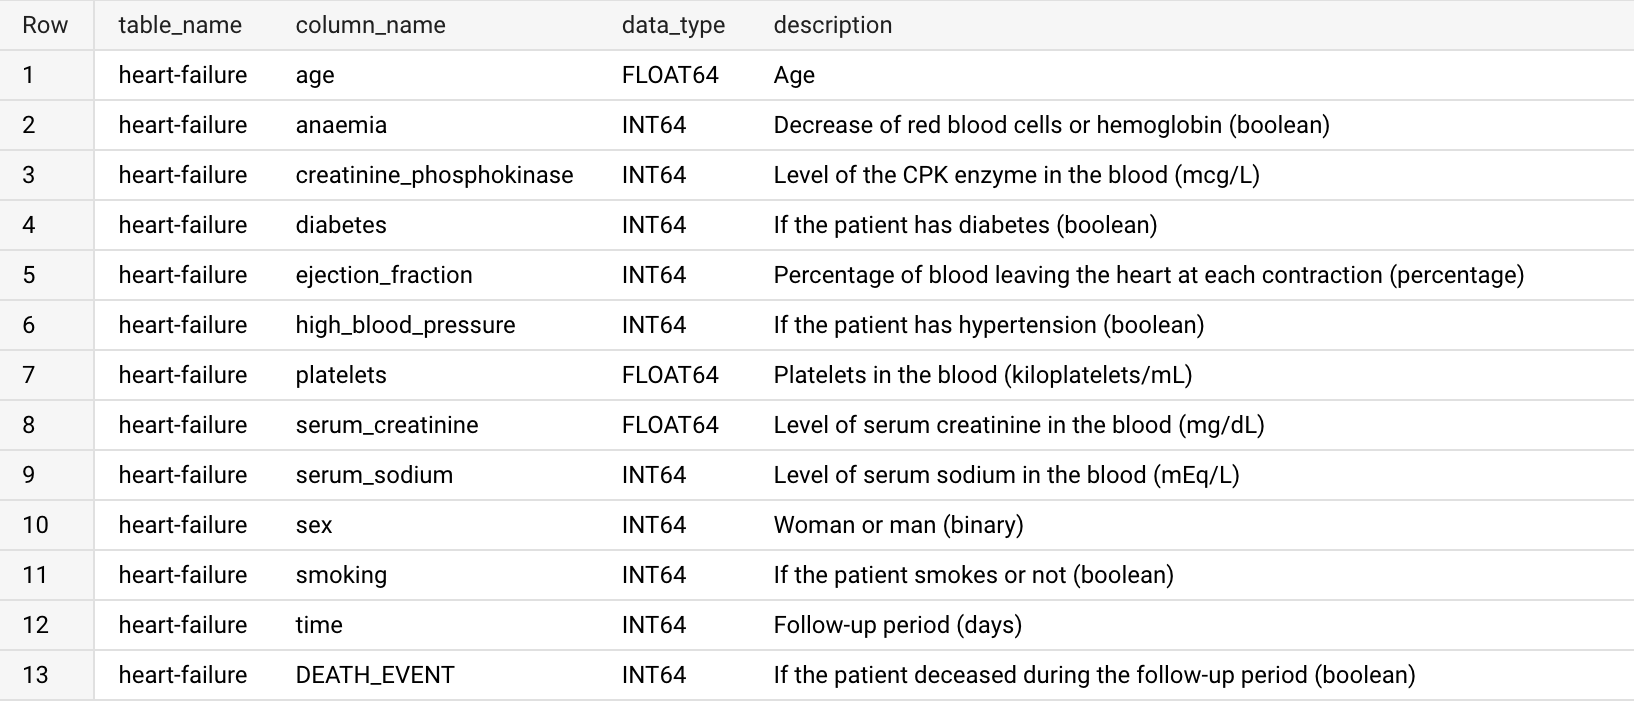

Ini adalah penjelasan dataset berdasarkan assignment

# **5 - Exploratory Data Analysis (EDA)**

---

Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.



In [213]:
# Show 10 baris data awal
copyData.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
1,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100,1
2,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
3,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43,1
4,50.0,1,582,1,20,1,279000.0,1.0,134,0,0,186,0
5,70.0,1,125,0,25,1,237000.0,1.0,140,0,0,15,1
6,65.0,1,52,0,25,1,276000.0,1.3,137,0,0,16,0
7,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66,1
8,60.0,1,76,1,25,0,196000.0,2.5,132,0,0,77,1
9,59.0,1,280,1,25,1,302000.0,1.0,141,0,0,78,1


Berikut 10 data awal pada dataset sesuai dengan instruksi assignment

In [214]:
# Show 10 baris data akhir
copyData.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,64.0,0,1610,0,60,0,242000.00,1.0,137,1,0,113,0
290,62.0,0,30,1,60,1,244000.00,0.9,139,1,0,117,0
291,53.0,0,196,0,60,0,220000.00,0.7,133,1,1,134,0
292,70.0,1,171,0,60,1,176000.00,1.1,145,1,1,146,0
293,60.0,1,95,0,60,0,337000.00,1.0,138,1,1,146,0
294,63.0,1,122,1,60,0,267000.00,1.2,145,1,0,147,0
295,45.0,0,308,1,60,1,377000.00,1.0,136,1,0,186,0
296,70.0,0,97,0,60,1,220000.00,0.9,138,1,0,186,0
297,53.0,1,446,0,60,1,263358.03,1.0,139,1,0,215,0
298,50.0,0,582,0,62,1,147000.00,0.8,140,1,1,192,0


Berikut 10 data akhir pada dataset sesuai dengan instruksi assignment

In [215]:
# Beginning data insight
copyData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Dari data diatas dapat dilihat untuk data `age` tergolong normal distribution, untuk data `creatinine_phosphokinase` cenderung right extreme. Sementara menurut Jurnal [ini](https://repositori.usu.ac.id/handle/123456789/15293) `ejection_fraction` gagal jantung ditandai jika nilainya < 40%.

In [216]:
# check data info
copyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [217]:
# Melihat banyaknya orang yang merokok berdasarkan gender
copyData.groupby(['sex'])['smoking'].value_counts()

sex  smoking
0    0          101
     1            4
1    0          102
     1           92
Name: smoking, dtype: int64

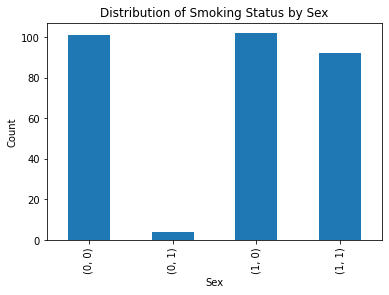

In [218]:
# Visualisasi
ax = copyData.groupby(['sex', 'smoking']).size().plot(kind='bar')

# Customize the plot
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Distribution of Smoking Status by Sex')
plt.show()

Perempuan dengan kategori tidak merokok ada 101 orang dan yang merokok ada 4 orang, sedangkan pria yang tidak merokok ada 102 orang dan yang merokok ada 92 orang.

In [219]:
# Melihat banyaknya orang yang diabetes berdasarkan gender
copyData.groupby(['sex'])['diabetes'].value_counts()

sex  diabetes
0    1            55
     0            50
1    0           124
     1            70
Name: diabetes, dtype: int64

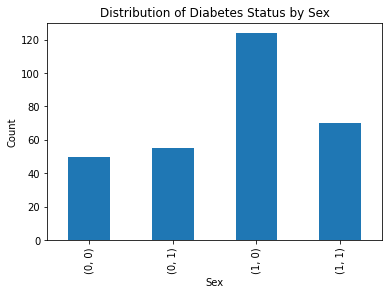

In [220]:
# Visualisasi
az = copyData.groupby(['sex', 'diabetes']).size().plot(kind='bar')

# Customize the plot
az.set_xlabel('Sex')
az.set_ylabel('Count')
az.set_title('Distribution of Diabetes Status by Sex')
plt.show()

Dari data dan visualisasi diatas didapat bahwa wanita dengan tidak diabetes ada sebanyak 50 orang dan yang diabetes ada 55 orang, sedangkan pria dengan tidak diabetes ada 124 orang dan diabetes ada 70 orang

In [221]:
# Data age binning
criteria = [
    (copyData['age'] >= 30) & (copyData['age'] < 50),
    (copyData['age'] >= 50) & (copyData['age'] < 60),
    (copyData['age'] >= 60) & (copyData['age'] < 70),
    (copyData['age'] >= 70) & (copyData['age'] < 80),
    (copyData['age'] >= 80) & (copyData['age'] < 90),
    (copyData['age'] >= 90)
]

binLabels = ['under50', 'under60', 'under70', 'under80', 'under90', 'more90']

copyData['age_bin'] = pd.cut(copyData['age'], bins=[39, 49, 59, 69, 79, 89, float('inf')], labels=binLabels)

In [222]:
copyData.age_bin.unique()

['under50', 'under70', 'under60', 'under80', 'under90', 'more90']
Categories (6, object): ['under50' < 'under60' < 'under70' < 'under80' < 'under90' < 'more90']

Berikut hasil binning berdasarkan kriteria umur

In [223]:
# Function Visualization
def diagnosticPlots(df, variable):
  plt.figure(figsize=(16, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram '+variable)

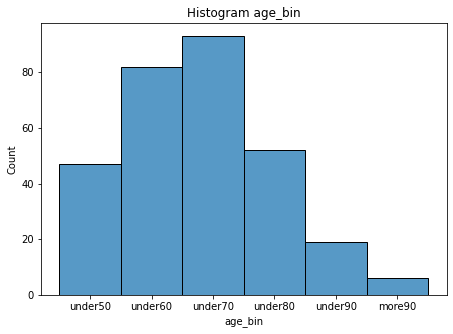

In [224]:
# Histogram Visualization
diagnosticPlots(copyData, 'age_bin')

Persebaran data terbanyak ada diusia dengan rentang dari 60 sampai 69 tahun dengan total lebih kurang 95 orang

In [225]:
# Melihat banyak data yang terkena anaemia
copyData.groupby('age_bin')['anaemia'].value_counts()

age_bin  anaemia
under50  0          33
         1          14
under60  0          45
         1          37
under70  1          47
         0          46
under80  0          33
         1          19
under90  0          12
         1           7
more90   1           5
         0           1
Name: anaemia, dtype: int64

Penderita aenemia terbanyak ada di rentang usia 60-69 tahun, hal ini terjadi kemungkinan dari dari faktor usia.

In [226]:
# Melihat banyak orang yang memiliki tekanan darah tinggi
copyData.groupby('age_bin')['high_blood_pressure'].value_counts()

age_bin  high_blood_pressure
under50  0                      33
         1                      14
under60  0                      56
         1                      26
under70  0                      64
         1                      29
under80  1                      29
         0                      23
under90  0                      15
         1                       4
more90   0                       3
         1                       3
Name: high_blood_pressure, dtype: int64

Disamping memiliki anaemia, ternyata rentang usia 60-69 banyak juga yang memilik tekanan darah tinggi, yaitu sebanyak 29 orang. Akan tetapi di range usia ini juga banyak yang tidak memiliki tekanan darah tinggi, yaitu sebanyak 64 orang. Hal ini disebabkan kemungkinan banyak dari mereka yang menjalani pola hidup sehat maupun konsumsi obat pengontrol tekanan darah.

In [227]:
# Melihat data perokok
copyData.groupby(['age_bin', 'sex'])['smoking'].value_counts()

age_bin  sex  smoking
under50  0    0          20
         1    0          16
              1          11
under60  0    0          25
              1           1
         1    0          28
              1          28
under70  0    0          34
              1           1
         1    0          30
              1          28
under80  0    0          16
              1           2
         1    0          17
              1          17
under90  0    0           4
         1    0           8
              1           7
more90   0    0           2
         1    0           3
              1           1
Name: smoking, dtype: int64

Ternyata rentang umur 50-59 tahun dan 60-69 tahun itulah mereka yang paling banyak merokok dan kebanyakan dari perokok adalah wanita

(27, 14)
(20, 14)


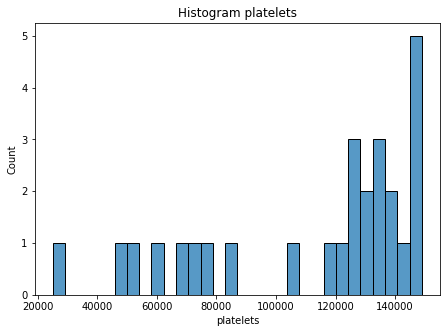

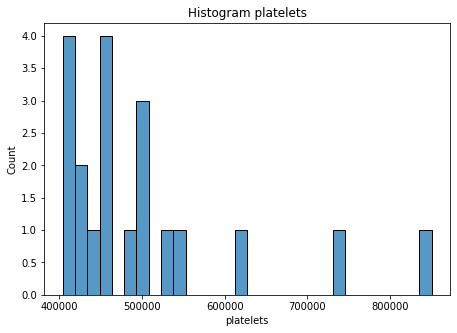

In [228]:
# Melihat data kadar platelets < 150,000  dan  > 450,000
underPlatelets = copyData.loc[(copyData['platelets'] < 150000)]

# Melihat data kadar platelets  > 400,000
upperPlatelets = copyData.loc[(copyData['platelets'] > 400000)]

# Ploting
diagnosticPlots(underPlatelets, 'platelets')
diagnosticPlots(upperPlatelets, 'platelets')
print(underPlatelets.shape)
print(upperPlatelets.shape)

Menurut situs [OneBlood.org](https://www.oneblood.org/media/blog/platelets/what-is-a-normal-platelet-count.stml) kadar platelets normal ada di range 150,000 - 400,000. Data diatas adalah mereka yang memiliki kadar platelets dibawah 150,000 dan diatas 400,000. Hal tersebut membahayakan karena platelets berfungsi dalam melakukan pembekuan darah jika terjadi luka, jika kadarnya kurang atau lebih dari range tersebut maka luka tidak dapat dicover dan darahnya akan terus keluar. Untuk data platelets < 150,000 terbanyak ada di kisaran 145,000 dengan total sebanyak 5 orang, sedangkan untuk kadar platelets > 400,000 ada di kisaran 410,000 sebanyak 4 orang dan 455,000 ada sebanyak 4 orang.

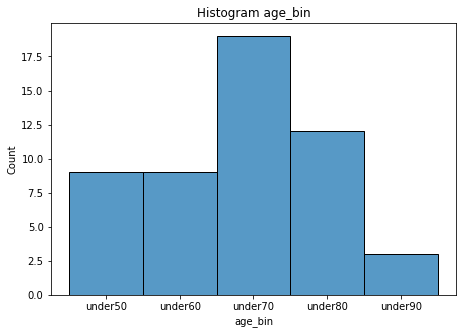

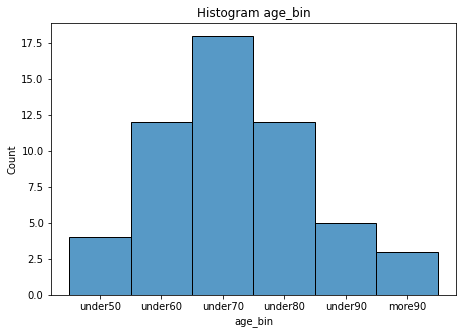

In [229]:
# melihat kadar serum_creatinine berdasarkan gender
wsc = copyData.loc[(copyData['sex'] == 0) & (copyData['serum_creatinine'] > 1.04)]
msc = copyData.loc[(copyData['sex'] == 1) & (copyData['serum_creatinine'] > 1.35)]

# Ploting data
diagnosticPlots(wsc, 'age_bin')
diagnosticPlots(msc, 'age_bin')

Menurut data untuk wanita dewasa kadar `serum_creatinine` normal yaitu 0.59 to 1.04 mg/dL, data diatas adalah banyaknya wanita dewasa yang memiliki kadar `serum_creatinine` diatas batas atas. Umur dengan range 60-69 tahun yang paling banyak memiliki kadar `serum_creatinine` diatas batas atas. Untuk pria dewasa kadar normal `serum_creatinine` adalah 0.74 to 1.35 mg/dL, sama halnya dengan data wanita, rentang umur 60-69 adalah yang paling banyak datanya.

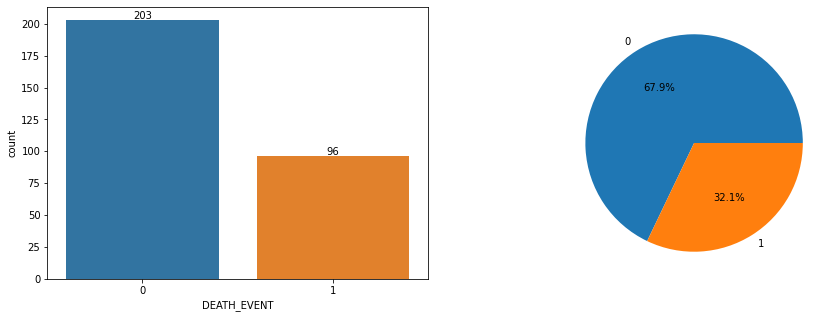

In [230]:
# Visualization between death and gender
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='DEATH_EVENT', data = copyData)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(copyData.DEATH_EVENT.value_counts(), labels= copyData.DEATH_EVENT.value_counts().index, autopct = '%1.1f%%')
plt.show()

Jumlah kematian tertinggi dari ada ada pada wanita dengan total 67.9% dibanding pria dengan 32.1%

# **6. Data Preprocessing**

---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 6.1 *Split data between X (Features) and y (Target)*

In [231]:
# Split data between x and y
X = copyData.drop(columns=['DEATH_EVENT'])
y = copyData['DEATH_EVENT']

## 6.2 Missing Value Handling

In [232]:
# Check Missing Value
print('Missing Value Data X : ')
print(X.isnull().sum())
print('')
print('Missing Value Data y : ')
print(y.isnull().sum())

Missing Value Data X : 
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
age_bin                     0
dtype: int64

Missing Value Data y : 
0


Tidak ada missing value di data X ataupun y

## 6.3 Split data for Train-set and Test-set

In [233]:
# Split data for Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

# Check shape data
print('Shape data X_train : ', X_train.shape)
print('Shape data X_test  : ', X_test.shape)
print('Shape data y_train : ', y_train.shape)
print('Shape data y_test  : ', y_test.shape)

Shape data X_train :  (239, 13)
Shape data X_test  :  (60, 13)
Shape data y_train :  (239,)
Shape data y_test  :  (60,)


pembagian data untuk X_train ada 239 baris dan 13 kolom, X_test ada 60 baris dan 13 kolom. Sedangkan data y_train ada 239 data dan y_test ada 60 data

## 6.4 Outlier Handling

In [234]:
# Define function outlier visualization
def diagnosticVis(df, variable):
  plt.figure(figsize = (15, 6))

  # Histogram 
  plt.subplot(1, 2, 1)
  sns.histplot(df[variable], bins=30)
  plt.title('Histogram '+variable)

  # Boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(y = df[variable])
  plt.title('Boxplot '+variable)

  plt.show()

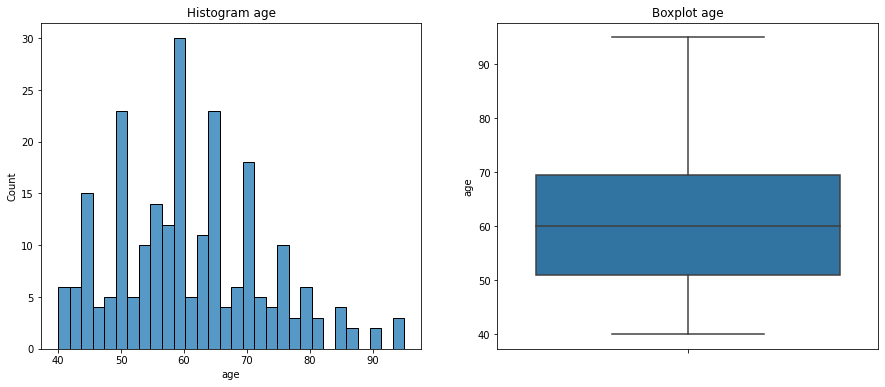

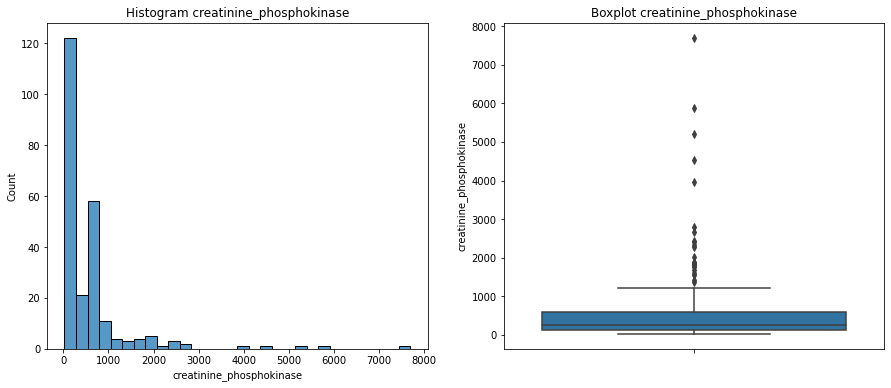

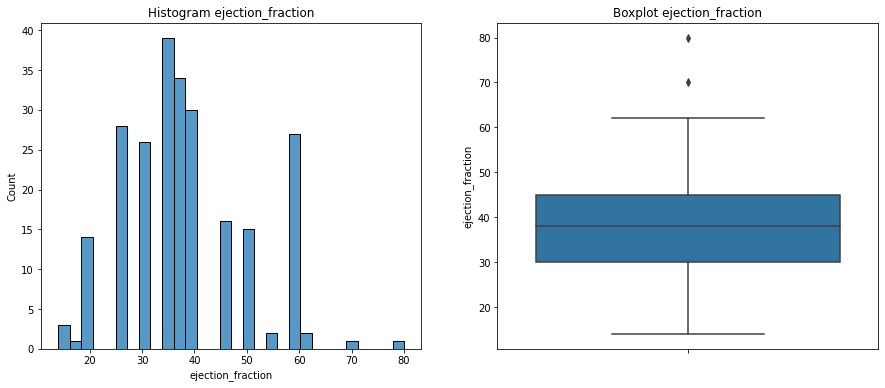

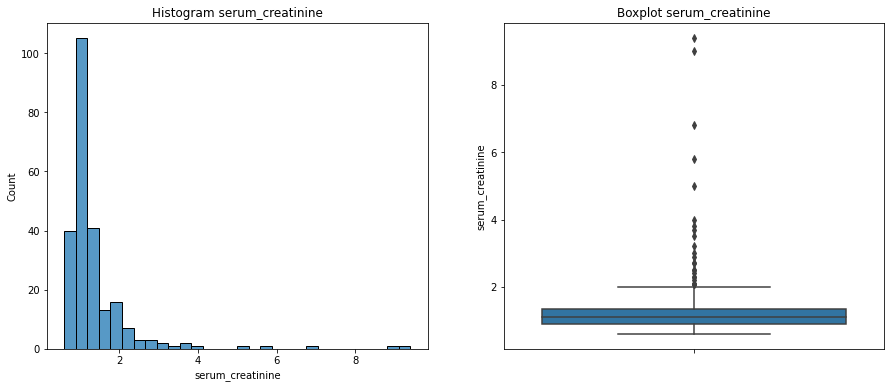

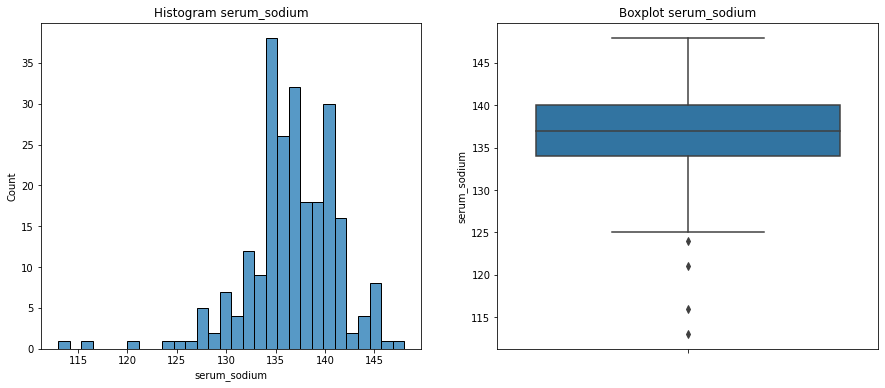

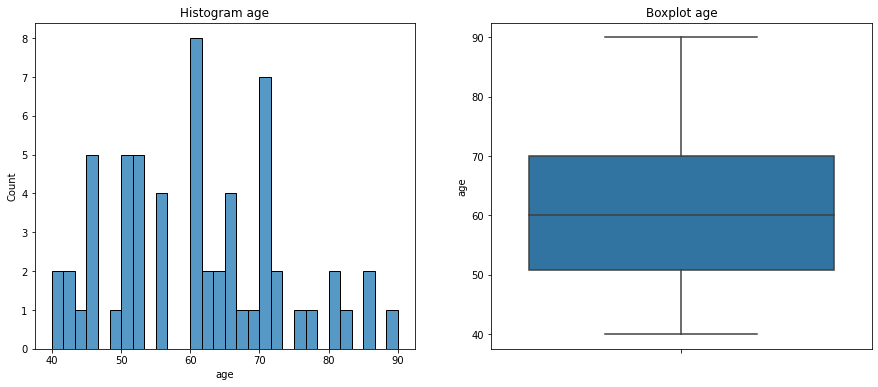

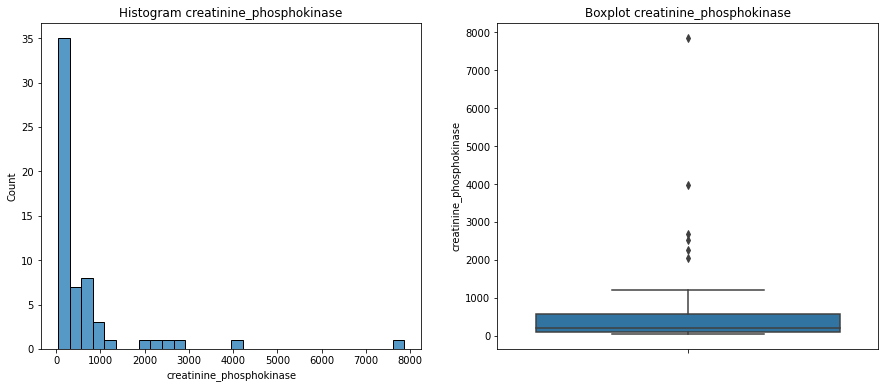

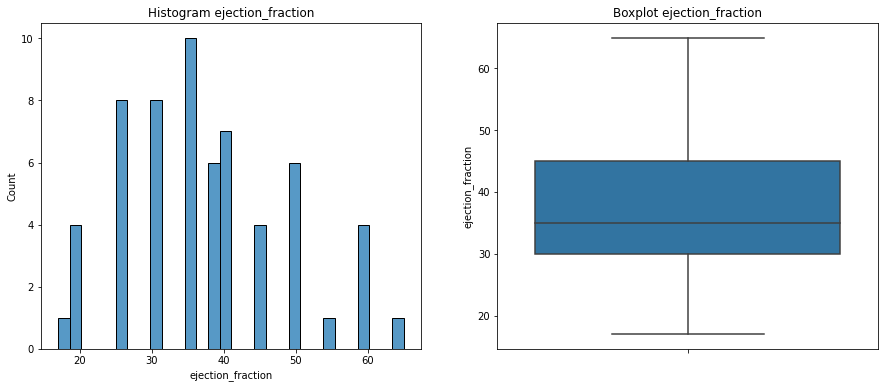

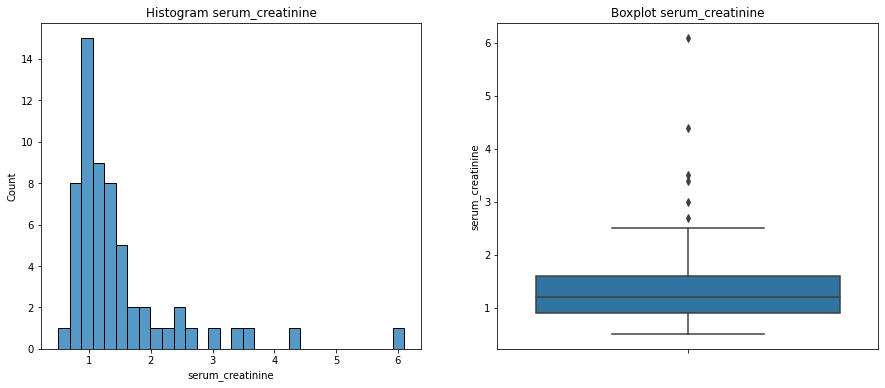

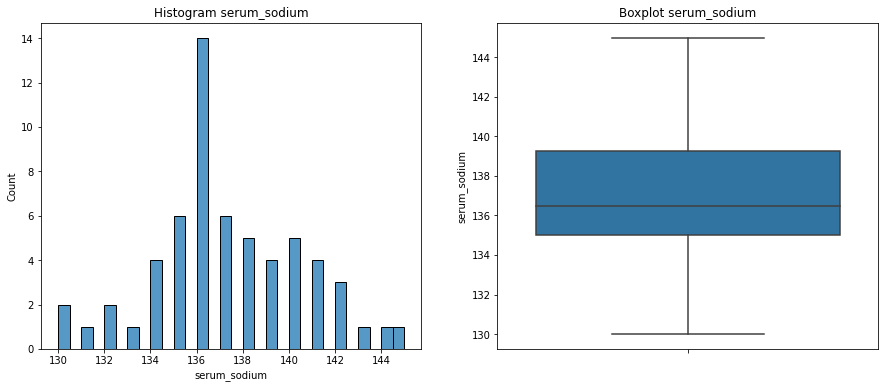

In [235]:
# Outlier data X_train
diagnosticVis(X_train, 'age')
diagnosticVis(X_train, 'creatinine_phosphokinase')
diagnosticVis(X_train, 'ejection_fraction')
diagnosticVis(X_train, 'serum_creatinine')
diagnosticVis(X_train, 'serum_sodium')

# Outlier data X_test
diagnosticVis(X_test, 'age')
diagnosticVis(X_test, 'creatinine_phosphokinase')
diagnosticVis(X_test, 'ejection_fraction')
diagnosticVis(X_test, 'serum_creatinine')
diagnosticVis(X_test, 'serum_sodium')

Berikut data-data outlier dari data X_train dan X_test, saya berasumsi bahwa memang ada orang yang memiliki kadar `creatinine_phosphokinase, ejection_fraction, serum_creatinine` dan `serum_sodium` diatas batas normal dari kadar seharusnya. Hal ini disebabkan kemungkinan karena faktor keturunan, faktor usia dan faktor external lainnya yang menyebabkan mereka memiliki kadar diluar dari batas normal. Jadi saya akan membiarkan outlier diatas

## 6.5 Feature Selection



In [236]:
# Feature selection
X_train.drop(['age'], axis=1, inplace=True)
X_test.drop(['age'], axis=1, inplace=True)

Saya menghapus kolom `age` karena saya sudah mendefinisikan kolom baru yaitu `age_bin` yang datanya berupa kriteria data range umur 

## 6.6 Split between Numerical and Categorical

In [237]:
# Split data numerical and categorical
numCol = X_train.select_dtypes(include = np.number).columns.tolist()
catCol = X_train.select_dtypes(include = ['category', 'object']).columns.tolist()

# Display
print('Numerical Data   : ', numCol)
print('Categorical Data : ', catCol)

Numerical Data   :  ['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Categorical Data :  ['age_bin']


In [238]:
# Split Train-set and Test-set into numerical
X_trainNum = X_train[numCol]
X_testNum = X_test[numCol]

# Split Train-set and Test-set into categorical
X_trainCat = X_train[catCol]
X_testCat = X_test[catCol]

Berikut pembagian data berdasarkan numerical dan categorical

## 6.7 Feature Scaling

In [239]:
# Scaling data with Robust
# Function scaler
scaler = RobustScaler()
scaler.fit(X_trainNum)

# Apply scaling
X_trainScaled = scaler.transform(X_trainNum)
X_testScaled = scaler.transform(X_testNum)

# Display 
X_trainScaled

array([[ 1.        , -0.27795874,  0.        , ...,  0.        ,
         0.        ,  0.70229008],
       [ 0.        , -0.09554832,  0.        , ..., -1.        ,
         0.        ,  0.97709924],
       [ 0.        , -0.34744843,  0.        , ...,  0.        ,
         0.        ,  0.52671756],
       ...,
       [ 1.        ,  1.72421281,  1.        , ..., -1.        ,
         0.        ,  0.98473282],
       [ 1.        , -0.05646037,  1.        , ...,  0.        ,
         1.        ,  0.48091603],
       [ 1.        , -0.28664495,  0.        , ..., -1.        ,
         0.        , -0.77862595]])

Berikut hasil scaling data numerical

## 6.8 Feature Encoding

In [240]:
# Label encoding
encoder = LabelEncoder()

# Apply encoder
X_trainCat['age_bin_enc'] = encoder.fit_transform(X_train['age_bin'])
X_testCat['age_bin_enc'] = encoder.fit_transform(X_test['age_bin'])

# Drop column
X_trainCat.drop(['age_bin'], axis=1, inplace=True)
X_testCat.drop(['age_bin'], axis=1, inplace=True)

# Display
X_trainCat

,age_bin_enc
197,1
52,3
296,4
192,4
190,3
...,...
140,3
245,2
27,2
163,4


Data categorical berhasil di drop dengan menggunakan label encoder

## 6.9 Concate between Numerical and Categorical

In [241]:
# Concate data numerical and categorical
X_trainFinal = np.concatenate([X_trainScaled, X_trainCat], axis=1)
X_testFinal = np.concatenate([X_testScaled, X_testCat], axis=1)

# Display
X_trainFinal

array([[ 1.        , -0.27795874,  0.        , ...,  0.        ,
         0.70229008,  1.        ],
       [ 0.        , -0.09554832,  0.        , ...,  0.        ,
         0.97709924,  3.        ],
       [ 0.        , -0.34744843,  0.        , ...,  0.        ,
         0.52671756,  4.        ],
       ...,
       [ 1.        ,  1.72421281,  1.        , ...,  0.        ,
         0.98473282,  2.        ],
       [ 1.        , -0.05646037,  1.        , ...,  1.        ,
         0.48091603,  4.        ],
       [ 1.        , -0.28664495,  0.        , ...,  0.        ,
        -0.77862595,  4.        ]])

# **7 - Model Definition**

---

Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 7.1 Bagging Classifier

In [242]:
%%time
# Define Bagging
baggBase = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 200,
    max_samples = 30,
    bootstrap = True,
    random_state = 19
)

CPU times: user 57 µs, sys: 0 ns, total: 57 µs
Wall time: 62.2 µs


## 7.2 Random Forest Classifier

In [243]:
%%time
# Define Random Forest
randForBase = RandomForestClassifier(
    n_estimators = 420,
    max_leaf_nodes = 19,
    random_state = 19,
    criterion = 'entropy'
)

CPU times: user 54 µs, sys: 8 µs, total: 62 µs
Wall time: 68.4 µs


## 7.3 Ada Boosting Classifier

In [244]:
%%time
# Define Ada Boosting
adaBase = AdaBoostClassifier(
    n_estimators = 200,
    learning_rate = 0.8,
    algorithm = 'SAMME',
    random_state = 19,
)

CPU times: user 27 µs, sys: 4 µs, total: 31 µs
Wall time: 35.5 µs


# 8 - Model Training

---



Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## 8.1 Bagging Classifier Training

In [245]:
%%time
# Train to data
baggBase.fit(X_trainFinal, y_train)
y_predTrainBagg = baggBase.predict(X_trainFinal)
y_predTestBagg = baggBase.predict(X_testFinal)

CPU times: user 672 ms, sys: 0 ns, total: 672 ms
Wall time: 698 ms


In [246]:
# Check accuracy score of Bagging Classifier
print('Accuracy Score - Train - Bagging Classifier : ', accuracy_score(y_train, y_predTrainBagg))
print('Accuracy Score - Test - Bagging Classifier : ', accuracy_score(y_test, y_predTestBagg))

Accuracy Score - Train - Bagging Classifier :  0.8702928870292888
Accuracy Score - Test - Bagging Classifier :  0.9


Model membaik pada data test karena mendapatkan peningkatan sebesar 0.03

## 8.2 Random Forest Classifier Training

In [247]:
%%time
# Train to data
randForBase.fit(X_trainFinal, y_train)
y_predTrainRandFor = randForBase.predict(X_trainFinal)
y_predTestRandFor = randForBase.predict(X_testFinal)

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.37 s


In [248]:
# Check accuracy score of Random Forest Classifier
print('Accuracy Score - Train - Random Forest Classifier : ', accuracy_score(y_train, y_predTrainRandFor))
print('Accuracy Score - Test - Random Forest Classifier : ', accuracy_score(y_test, y_predTestRandFor))

Accuracy Score - Train - Random Forest Classifier :  0.9665271966527197
Accuracy Score - Test - Random Forest Classifier :  0.9


Model cenderung good-fit walaupun ada penurunan 0.06 terhadap data test

## 8.3 Ada Boosting Classifier

In [249]:
%%time
# Train to data
adaBase.fit(X_trainFinal, y_train)
y_predTrainAda = adaBase.predict(X_trainFinal)
y_predTestAda = adaBase.predict(X_testFinal)

CPU times: user 614 ms, sys: 0 ns, total: 614 ms
Wall time: 650 ms


In [250]:
# Check accuracy score of Ada Boosting Classifier
print('Accuracy Score - Train - Ada Boosting Classifier : ', accuracy_score(y_train, y_predTrainAda))
print('Accuracy Score - Test - Ada Boosting Classifier : ', accuracy_score(y_test, y_predTestAda))

Accuracy Score - Train - Ada Boosting Classifier :  0.9079497907949791
Accuracy Score - Test - Ada Boosting Classifier :  0.9


Model cenderung good-fit walaupun ada penurunan 0.01 terhadap data test

# **9 - Model Evaluation**

---

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 9.1 Evaluate with Classification Score

In [251]:
%%time
print('='*65)
# Display classification report for Bagging Classifier
print('Classification Report - Train Data - Bagging Classifier : ')
print(classification_report(y_train, y_predTrainBagg))
print('='*65)
print('Classification Report - Test Data - Bagging Classifier : ')
print(classification_report(y_test, y_predTestBagg))
print('='*65)
# Display classification report for Random Forest Classifier
print('Classification Report - Train Data - Random Forest Classifier : ')
print(classification_report(y_train, y_predTrainRandFor))
print('='*65)
print('Classification Report - Test Data - Random Forest Classifier : ')
print(classification_report(y_test, y_predTestRandFor))
print('='*65)
# Display classification report for Ada Boosting Classifier
print('Classification Report - Train Data - Ada Boosting Classifier : ')
print(classification_report(y_train, y_predTrainAda))
print('='*65)
print('Classification Report - Test Data - Ada Boosting Classifier : ')
print(classification_report(y_test, y_predTestAda))
print('='*65)

Classification Report - Train Data - Bagging Classifier : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       162
           1       0.85      0.73      0.78        77

    accuracy                           0.87       239
   macro avg       0.86      0.83      0.85       239
weighted avg       0.87      0.87      0.87       239

Classification Report - Test Data - Bagging Classifier : 
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.84      0.84      0.84        19

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60

Classification Report - Train Data - Random Forest Classifier : 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       162
           1       0.97      0.92      0.95        77



Dari classification score diatas, saya simpulkan :
1. Nilai recall pada Bagging Classifier mengalami peningkatan cukup baik, yaitu 11%. Hal ini saya lakukan agar False Negative dari model menurun.
2. Nilai recall pada Random Forest classifier mengalami penurunan 6% terhadap data test, mungkin saya harus mencari hyperparameter lain agar nilai recall tersebut meningkat dan dapat mengurangi False Negative
3. Nilai recall pada Ada Boosting classifier mengalami peningkatan 7% terhadap data test. Hal ini cukup baik karena dapat mengurangi False Negative terhadap prediksi

## 9.2 Evaluate with Confusion Matrix

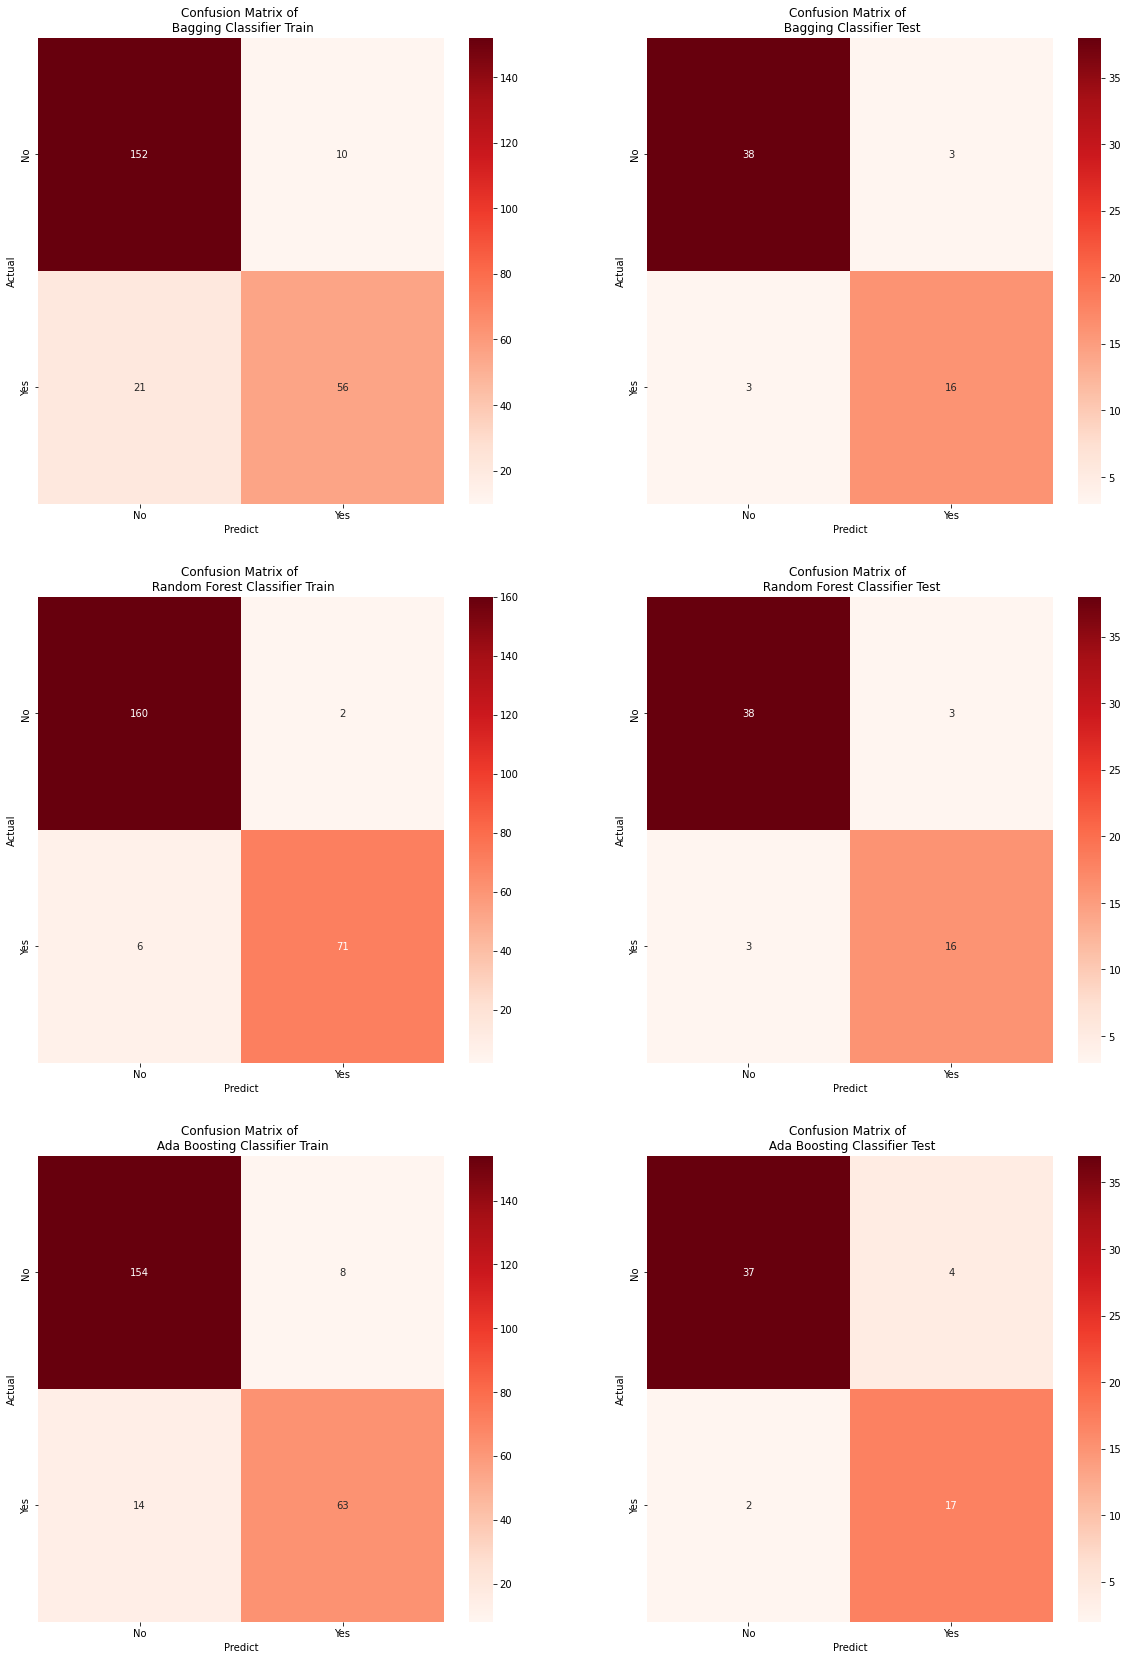

CPU times: user 1.81 s, sys: 48.2 ms, total: 1.86 s
Wall time: 1.86 s


In [252]:
%%time
# Visualization with confusion matrix
modelCM = [confusion_matrix(y_train, y_predTrainBagg), 
           confusion_matrix(y_test, y_predTestBagg),
           confusion_matrix(y_train, y_predTrainRandFor), 
           confusion_matrix(y_test, y_predTestRandFor),
           confusion_matrix(y_train, y_predTrainAda), 
           confusion_matrix(y_test, y_predTestAda)]

modelAlias = ['Bagging Classifier Train', 'Bagging Classifier Test',
              'Random Forest Classifier Train', 'Random Forest Classifier Test',
              'Ada Boosting Classifier Train', 'Ada Boosting Classifier Test',]

# Confusion Matrix
plt.figure(figsize = (20, 60))
for i in range(len(modelCM)):
  plt.subplot(6, 2, i+1)
  fig = sns.heatmap(modelCM[i], annot = True, fmt = 'd', cmap = 'Reds')
  plt.title(f'Confusion Matrix of \n {modelAlias[i]}')
  fig.set_xticklabels(['No', 'Yes'])
  fig.set_yticklabels(['No', 'Yes'])
  plt.xlabel('Predict')
  plt.ylabel('Actual')
plt.show()

Dari confusion matrix diatas dapat disimpulkan:
1. Pada Bagging classifier, False Negative memiliki presentase sebesar 8.8% terhadap data train, tetapi menurun menjadi 5% pada data test. Hal ini baik mengingat kita menghindari kenaikan nilai dari False Negative
2. Pada Random Forest classifer, False Negative memiliki presentase sebesar 2.5% terhadap data train, tetapi malah meningkat menjadi 5% terhadap data test. Hal ini cukup mengkhawatirkan karena ada peningkatan presentase mendekati 100% terhadap False Negative. Mungkin kita harus mencari hyperparameter lain agar False Negative mengalami penurunan
3. Pada Ada Boosting classifier, False Negative memiliki presentase sebesar 5.9% terhadap data train, tetapi meningkat menjadi 3.3% terhadap data test. Hal ini baik mengingat kita menghindari kenaikan nilai dari False Negative

# **10 - Model Inference**

---

Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [253]:
# Get inference data
infData = copyData.sample(20, random_state=19)

# Reset index
infData = infData.reset_index()

# Drop column index
infData.drop(columns=['index'], axis=1, inplace=True)

# Display
infData

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin
0,60.000,1,76,1,25,0,196000.00,2.50,132,0,0,77,1,under70
1,60.000,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,under70
2,50.000,1,159,1,30,0,302000.00,1.20,138,0,0,29,0,under60
3,75.000,0,675,1,60,0,265000.00,1.40,125,0,0,205,0,under80
4,45.000,1,981,0,30,0,136000.00,1.10,137,1,0,11,1,under50
5,80.000,0,582,1,35,0,350000.00,2.10,134,1,0,174,0,under90
6,65.000,1,305,0,25,0,298000.00,1.10,141,1,0,87,0,under70
7,73.000,0,582,0,20,0,263358.03,1.83,134,1,0,198,1,under80
8,68.000,1,220,0,35,1,289000.00,0.90,140,1,1,20,1,under70
9,50.000,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0,under60


In [254]:
# Split data numerical and categorical
infDataNum = infData[numCol]
infDataCat = infData[catCol]

In [255]:
# Feature scaling
infDataScaled = scaler.transform(infDataNum)

# Feature encoding
infDataCat['age_bin_enc'] = encoder.fit_transform(infDataCat['age_bin'])

# Drop column
infDataCat.drop(columns=['age_bin'], axis=1, inplace=True)

# Concate data
infDataFinal = np.concatenate([infDataScaled, infDataCat], axis=1)

In [256]:
%%time
# Applying model
# Bagging classifier
y_predInfBagg = baggBase.predict(infDataFinal)

# Random forest classifier
y_predInfRandFor = randForBase.predict(infDataFinal)

# Ada Boosting classifier
y_predInfAda = adaBase.predict(infDataFinal)

CPU times: user 78.5 ms, sys: 758 µs, total: 79.3 ms
Wall time: 81.2 ms


In [257]:
# Create dataframe to show the model prediction
y_predBaggDF = pd.DataFrame(y_predInfBagg, columns=['Predict - Bagging'])
y_predRandForDF = pd.DataFrame(y_predInfRandFor, columns=['Predict - Random Forest'])
y_predAdaDF = pd.DataFrame(y_predInfAda, columns=['Predict - Ada Boosting'])

In [258]:
# Grouping data inference with prediction
infDataFinalDF = pd.concat([infData, y_predBaggDF, y_predRandForDF, y_predAdaDF], axis=1)

# Display
infDataFinalDF

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,Predict - Bagging,Predict - Random Forest,Predict - Ada Boosting
0,60.000,1,76,1,25,0,196000.00,2.50,132,0,0,77,1,under70,1,1,1
1,60.000,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,under70,0,1,1
2,50.000,1,159,1,30,0,302000.00,1.20,138,0,0,29,0,under60,1,0,1
3,75.000,0,675,1,60,0,265000.00,1.40,125,0,0,205,0,under80,0,0,0
4,45.000,1,981,0,30,0,136000.00,1.10,137,1,0,11,1,under50,1,1,1
5,80.000,0,582,1,35,0,350000.00,2.10,134,1,0,174,0,under90,0,0,1
6,65.000,1,305,0,25,0,298000.00,1.10,141,1,0,87,0,under70,0,0,0
7,73.000,0,582,0,20,0,263358.03,1.83,134,1,0,198,1,under80,1,1,1
8,68.000,1,220,0,35,1,289000.00,0.90,140,1,1,20,1,under70,1,1,1
9,50.000,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0,under60,0,0,0


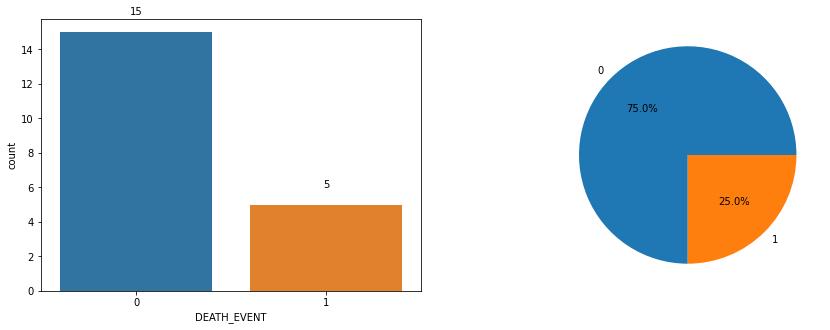

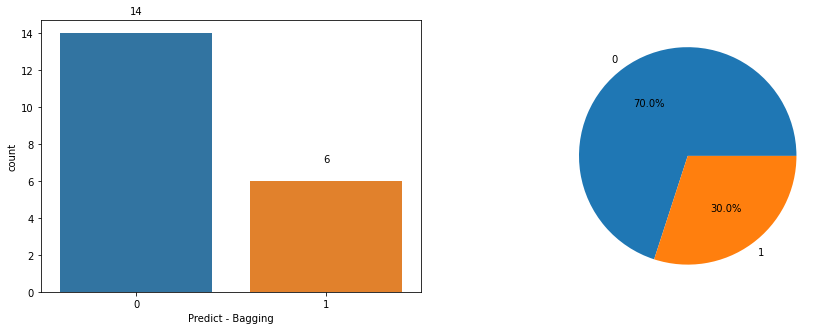

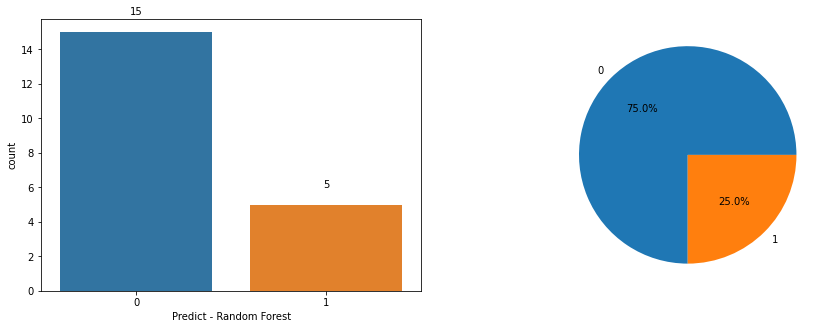

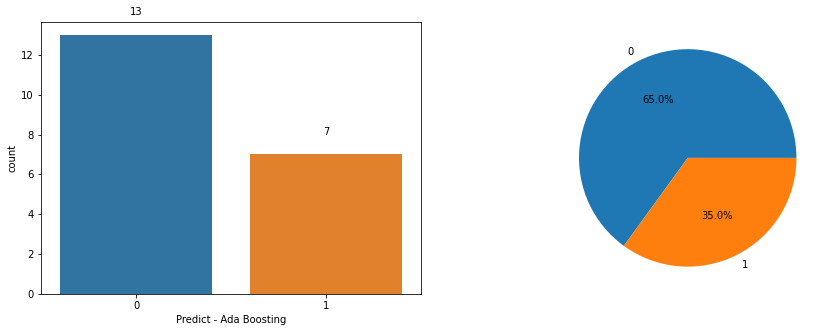

In [259]:
# Visualization between death and gender
# Orignal Data
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='DEATH_EVENT', data = infDataFinalDF)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(infDataFinalDF.DEATH_EVENT.value_counts(), labels= infDataFinalDF.DEATH_EVENT.value_counts().index, autopct = '%1.1f%%')
plt.show()

# Bagging Classifier prediction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='Predict - Bagging', data = infDataFinalDF)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(infDataFinalDF['Predict - Bagging'].value_counts(), labels= infDataFinalDF['Predict - Bagging'].value_counts().index, autopct = '%1.1f%%')
plt.show()

# Random Forest Classifier prediction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='Predict - Random Forest', data = infDataFinalDF)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(infDataFinalDF['Predict - Random Forest'].value_counts(), labels= infDataFinalDF['Predict - Random Forest'].value_counts().index, autopct = '%1.1f%%')
plt.show()

# Ada Boosting Classifier prediction
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.countplot(x='Predict - Ada Boosting', data = infDataFinalDF)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,height + 1, '{:1.0f}'.format(height), ha="center")

plt.subplot(1,2,2)
plt.pie(infDataFinalDF['Predict - Ada Boosting'].value_counts(), labels= infDataFinalDF['Predict - Ada Boosting'].value_counts().index, autopct = '%1.1f%%')
plt.show()

# **11 - Model Saving**

---

Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [260]:
# Saving the model
with open('BaggingClassifier.pkl', 'wb') as file1:
  pickle.dump(baggBase, file1)

with open('RandomForestClassifier.pkl', 'wb') as file1:
  pickle.dump(randForBase, file1)

with open('AdaBoostingClassifier.pkl', 'wb') as file1:
  pickle.dump(adaBase, file1)

with open('Scaling.pkl', 'wb') as file1:
  pickle.dump(scaler, file1)

with open('Encoder.pkl', 'wb') as file1:
  pickle.dump(encoder, file1)

with open('DataNumerical.txt', 'w') as file1:
  json.dump(numCol, file1)

with open('DataCategorical.txt', 'w') as file1:
  json.dump(catCol, file1)

# **12 - Conceptual Problems**


---



Jawab pertanyaan berikut:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
  - Latar belakang adanya bagging adalah untuk mengatasi permasalahan overfitting pada model prediksi. Overfitting terjadi ketika model terlalu kompleks dan terlalu spesifik untuk data training, sehingga tidak dapat digeneralisasi dengan baik untuk data baru yang belum pernah dilihat sebelumnya. Dalam kasus ini, model memiliki akurasi yang tinggi pada data training, tetapi memiliki performa yang buruk pada data testing. Dalam penggunaan algoritma bagging, model yang dihasilkan memiliki tingkat generalisasi yang lebih baik karena model yang dihasilkan lebih stabil dan mengurangi kemungkinan terjadinya overfitting. 
  - Cara kerja bagging adalah dengan melakukan bootstrap resampling pada data training sebanyak k kali, sehingga diperoleh k dataset training yang berbeda. Setiap dataset training digunakan untuk melatih sebuah model prediksi, dan hasil prediksi dari masing-masing model diambil sebagai input untuk melakukan agregasi. Agregasi dilakukan dengan mengambil rata-rata (untuk kasus regresi) atau mode (untuk kasus klasifikasi) dari hasil prediksi dari masing-masing model. Hasil agregasi inilah yang menjadi prediksi akhir dari model bagging. 
  - Dalam proses pembuatan model bagging, biasanya digunakan algoritma decision tree sebagai model prediksi karena decision tree cenderung mengalami overfitting pada data training. Namun dengan menggunakan teknik bagging, decision tree dapat menghasilkan model yang lebih stabil dan menghasilkan performa prediksi yang lebih baik pada data testing.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
  - Random Forest bekerja dalam dua fase. Fase pertama yaitu menggabungkan sejumlah N decision tree untuk membuat Random Forest. Kemudian fase kedua adalah membuat prediksi untuk setiap tree yang dibuat pada fase pertama.
  - Cara kerja Ada Boosting Classifier hampir sama dengan Random Forest akan tetapi ada 2 perbedaan, yaitu perbedaan pertama adalah algoritma Ada Boosting membangun stumps forest. Stumps adalah pohon yang hanya terbuat dari satu cabang dan dua daun. Kedua, stumps yang dibangun tidak memiliki bobot yang sama pada prediksi akhir. Artinya, stumps yang memiliki error besar memiliki pengaruh yang kecil saat pengambilan keputusan. Perbedaan yang kedua adalah urutan pembuatan stumps sangat penting karena setiap stumps bertujuan untuk mengurangi error yang dihasilkan oleh stumps sebelumnya. 

# **13 - Pengambilan Kesimpulan**

---


Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Dari eksplorasi dan modeling data diatas dapat diambil kesimpulan :
1. model Random Forest memiliki prediksi yang baik terhadap data inference, sebab nilai akurasinya sama dengan data inference, sedangkan Bagging classifier salah prediksi 5% terhadap data inference dan Ada Boosting salah prediksi 10% terhadap data inference. Hal ini terjadi mungkin pada saat training, model menemukan adanya outlier-outlier yang tidak tertangani.
2. Rentang umur 50-69 tahun adalah mereka yang terbanyak perokok dan yang paling banyak adalah wanita, kemungkinan kebiasaan ini mereka bawa dari mereka remaja.
3. Bagging classifier dan Ada boosting classifier mengalami peningkatan recall untuk dapat mengurangi false negative sedangkan untuk random forest mengalami peningkatan yang artinya kemungkinan false negative akan semakin besar
4. 15.7% dari data adalah mereka yang memiliki kadar platelets diluar kadar normal, hal ini cukup mengkhawatirkan jika suatu saat mereka terluka, pada proses penyembuhannya akan memakan waktu, karena platelets itulah yang berfungsi untuk membekukan darah jika terjadi luka.
5. 32% dari data adalah mereka yang perokok, seharusnya kebiasaan merokok ini harus mereka hentikan karena dikhawatirkan dapat membuat kesehatan mereka semakin menurun dan rawan terserang penyakit.
6. 41.8% dari data adalah mereka yang terkena diabetes
7. 35% dari mereka adalah penderita tekanan darah tinggi, seharusnya mereka menjalani terapi obat pengontrol tekanan darah agar tidak terjadi tekanan darah tinggi mendadak yang dapat mengancam nyawa mereka.